## CODE TO DETECT LINES IN IMAGE 
  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_calendar = cv2.imread('calendar.jpg')

cv2.imshow('Given Image', image_calendar)
cv2.waitKey(0)
cv2.destroyAllWindows()

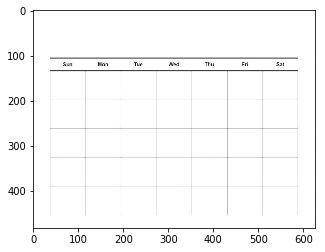

In [3]:
plt.imshow(image_calendar)

In [4]:
# convert image to gray
image_gray = cv2.cvtColor(image_calendar, cv2.COLOR_BGR2GRAY)
# apply canny edge detector
image_canny = cv2.Canny(image_gray, 50, 200, apertureSize = 3)
image_canny

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0, 255,   0],
       ..., 
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
cv2.imshow('canny image', image_canny)
cv2.waitKey()
cv2.destroyAllWindows()

# we want to find the lines in the images

## solution is Hough!

for that we need points that are on edges and using them we can decide lines 

In [6]:
# rho accuracy of 1 pixel and theta accuracy of np.pi / 180 (1 degree)
# threshold is number of points on line
# Try 300, 400 and 500
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 300)

In [7]:
lines
# Note that 1.57 rad is 89.95437
# Note that rho was the distance from the origin

array([[[   0.        ,    1.57079637]],

       [[ 481.        ,    1.57079637]],

       [[ 105.        ,    1.57079637]],

       [[ 107.        ,    1.57079637]],

       [[ 198.        ,    1.57079637]],

       [[ 200.        ,    1.57079637]],

       [[ 261.        ,    1.57079637]],

       [[ 263.        ,    1.57079637]],

       [[ 389.        ,    1.57079637]],

       [[ 391.        ,    1.57079637]],

       [[ 453.        ,    1.57079637]],

       [[ 455.        ,    1.57079637]],

       [[ 136.        ,    1.57079637]],

       [[ 133.        ,    1.57079637]],

       [[   0.        ,    0.        ]],

       [[ 325.        ,    1.57079637]],

       [[ 327.        ,    1.57079637]],

       [[ 624.        ,    0.        ]],

       [[ 432.        ,    0.        ]],

       [[ 194.        ,    0.        ]],

       [[ 196.        ,    0.        ]],

       [[ 430.        ,    0.        ]],

       [[ 117.        ,    0.        ]],

       [[ 272.        ,    0.     

In [11]:
len(lines)
# no of lines found in the image

30

In [9]:
lines.shape

(30, 1, 2)

In [20]:
# contains rho and theta values that is distace and angle in polar co-ordinate
print(lines[5]) 
print(lines[5][0][0])  # rho value
print(lines[5][0][1])  # theta value in rad

[[ 200.            1.57079637]]
200.0
1.5708


In [24]:
 if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            
            a = np.cos(theta)
            b = np.sin(theta)
           
            x0 = rho * a
            y0 = rho * b
            
#             give two points to draw line passing through that two points
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_calendar, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
cv2.imshow('Hough Lines', image_calendar)
cv2.waitKey()
cv2.destroyAllWindows()

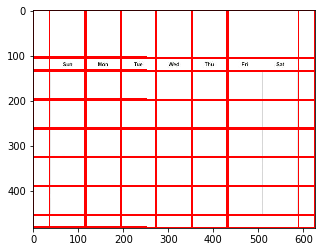

In [25]:
plt.imshow(image_calendar)